## Predict Online News Article Performance

- DATA: 
    - Obtained from the Google BigQuery database of a popular online newspaper
    - Each row in the table corresponds to a unique article

- OBJECTIVE:
    - Predict article performance (the amount of clicks an article will get over a 7 day period) using just an hour of data.

### 1.0 Import 

In [1]:
#Import some commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1 Import Data

In [2]:
#Read file - some pre-processing has been performed using Google BigQuery
df = pd.read_csv("2016_11_14_7dayOldArticles_60mins_edit.csv") #60 mins

### 1.2 Examine some columns and basic stats

In [3]:
df.head()

,articleId,articleId_totalViews_7days,date_time_min,age_day_Max,publish_date_min,artk_min_date_in_DB,sumrow_checkcolumn,MAX_article_date_time_mins_index,articleName,subSectionName,...,H1_view,H2_view,articleId_q1_fb_ref,articleId_q1_google_ref,articleId_q1_twitter_ref,articleId_q1_internal_ref,articleId_q1_paidFlag,articleId_q1_fb_paidPromo,articleId_q1_fb_internalFBPagePromo,articleId_q1_fb_organic
0,1875985,1091325,2016-09-29 08:34:47.687 UTC,0,2016-09-29,2016-09-29,101,60,miss universe winner who sparked donald trump ...,NaN,...,101,101,0,4,0,87,0,0,0,0
1,1721080,973517,2016-09-03 12:01:26.882 UTC,0,2016-09-03,2016-09-03,65853,60,cops arrest two women after bouncer who appear...,NaN,...,65853,65853,47136,16,1190,15038,2,2,44692,2442
2,1627032,827470,2016-08-17 12:02:48.876 UTC,0,2016-08-17,2016-08-17,637,60,‘we’re delighted to become a family’: big brot...,tv & showbiz:celebrity,...,637,637,0,30,0,586,0,0,0,0
3,1649598,764573,2016-08-21 18:55:42.886 UTC,0,2016-08-21,2016-08-21,55764,60,danny dyer beaten up in front of daughter by m...,tv & showbiz:bizarre,...,55764,55764,38091,330,3465,12146,0,0,30926,7165
4,1720830,760979,2016-09-03 11:56:16.096 UTC,0,2016-09-03,2016-09-03,2438,60,crocodile hunter steve irwin writes heartbreak...,NaN,...,2438,2438,578,5,120,1686,0,0,553,25


In [4]:
df.describe()

,articleId,articleId_totalViews_7days,age_day_Max,sumrow_checkcolumn,MAX_article_date_time_mins_index,paidFlag,mean_hourOfDay,RG_Homepage,RG_Article,RG_Section,...,H1_view,H2_view,articleId_q1_fb_ref,articleId_q1_google_ref,articleId_q1_twitter_ref,articleId_q1_internal_ref,articleId_q1_paidFlag,articleId_q1_fb_paidPromo,articleId_q1_fb_internalFBPagePromo,articleId_q1_fb_organic
count,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535,...,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000
mean,1714262.998977,10345.854492,0.047042,537.726613,58.016995,0.000033,12.914676,0.296691,0.264094,0,...,537.726613,537.726613,175.717994,25.644315,25.404480,263.223131,0.128464,0.118188,156.415047,19.184758
std,106021.228633,34507.967560,0.211733,2268.851129,6.644008,0.004402,6.090847,0.253922,0.133681,0,...,2268.851129,2268.851129,1278.515340,434.730077,136.288018,676.779803,11.274217,10.342640,1147.771030,188.263756
min,1282760.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1620971.000000,761.000000,0.000000,34.000000,59.000000,0.000000,9.520000,0.040000,0.180000,0,...,34.000000,34.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1714697.000000,2322.000000,0.000000,108.000000,60.000000,0.000000,13.130000,0.260000,0.260000,0,...,108.000000,108.000000,0.000000,3.000000,0.000000,73.000000,0.000000,0.000000,0.000000,0.000000
75%,1806295.500000,7523.000000,0.000000,304.000000,60.000000,0.000000,17.340000,0.530000,0.340000,0,...,304.000000,304.000000,0.000000,12.000000,1.000000,225.500000,0.000000,0.000000,0.000000,0.000000
max,1894366.000000,1091325.000000,1.000000,89422.000000,60.000000,0.630000,23.000000,1.000000,1.000000,0,...,89422.000000,89422.000000,47136.000000,58837.000000,6595.000000,15038.000000,1246.000000,1173.000000,44692.000000,12026.000000


In [5]:
for column in df.columns:
    print column

articleId
articleId_totalViews_7days
date_time_min
age_day_Max
publish_date_min
artk_min_date_in_DB
sumrow_checkcolumn
MAX_article_date_time_mins_index
articleName
subSectionName
paidFlag
mean_hourOfDay
RG_Homepage
RG_Article
RG_Section
RG_Facebook
RG_Twitter
RG_Google
RG_Other_Drudge_Direct
S_TVShowBiz
S_news
S_living
S_sport
S_other
fb_paidPromo
fb_internalPromo
fb_organic
view_15mins
view_30mins
view_45mins
H1_view
H2_view
articleId_q1_fb_ref
articleId_q1_google_ref
articleId_q1_twitter_ref
articleId_q1_internal_ref
articleId_q1_paidFlag
articleId_q1_fb_paidPromo
articleId_q1_fb_internalFBPagePromo
articleId_q1_fb_organic


#### Looking at the above:
- We have a table consisting of 20535 rows, each for a unique article on the newspaper's website
- We then have a number of attributes:
    - articleId - the unique article id for a specific article
    - articleId_totalViews_7days - the total amount of views/clicks for each article over a common 7day period
    - date_time_min - the date and time at which the article is first viewed
    - articleName - the article name or headline
    - subSectionName - the subSection in which the article is posted
    - paidFlag - whether the newspaper has paid to promote this article online
    - mean_hourOfDay - the average hour of day that the article was accessed
    - RG_Homepage/Article/Section/Facebook/Twitter/Google/Other - the RG (refferer group) - a percentage breakdown of where the traffic for each article is coming from
    - S_TVShowBiz/news/living/sport/other - the Section in which the article is posted
    - fb_paidPromo - paid promotion was performed on facebook
    - fb_internalPromo - article was promoted internally, on the newspapers facebook homepage
    - fb_organic - article was shared organically among users on facebook
    - view_15mins/30mins/45mins - views in the first 15, 30 and 45 mins respectively
    - H1_view - views in first hour
    - articleId_q1_fb_ref/google_ref/etc. - as above but aggregated over the first 15 minutes of the article's release

### 2.0 Null subSectionName
- We have some null entries in our dataset - not every subSectionName entry is filled
- Therefore we will perform some analysis of the articleNames and their associated subSectionNames, making use of TF-IDF vectorization
- Then, in cases where subSectionName is missing we will use the text present in the article headline to predict subSectionName

### 2.1 Create Text Analysis function
- Create a function that uses the genesis and nltk libraries to predict empty subSectionName values from the text in the article headline

In [6]:
def subSectionFill(df):
    '''Function to take in a dataframe with missing subSectionNames and use the
    text of the articleName to predict the correct subSectionName category'''
    
    from gensim.models import Word2Vec
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LogisticRegression
    import nltk
    nltk.download('punkt')
    
    # Use just two columns from our table. We'll take 'ArticleName',
    # extract tokens from it and turn into features
    train_set = df[["articleName", 'subSectionName']]

    # For usage in tokenizer Names should be text variables
    train_set["articleName"] = train_set["articleName"].astype(str) # All our article names need be strings

    # We'll take just those rows which contain subSectionName and will call them train set
    train_data = train_set[pd.notnull(df['subSectionName'])]
    test_data = train_set[pd.isnull(df['subSectionName'])]

    # Create NLTK vectorizer
    tf_vect = TfidfVectorizer(min_df=2, tokenizer=nltk.word_tokenize, preprocessor=None, stop_words='english')

    # Create features from artcile names
    train_data_features = tf_vect.fit_transform(train_data['articleName'])
    
    clf = LogisticRegression(n_jobs=1, C=1e5)
    clf = clf.fit(train_data_features, train_data['subSectionName'])

    # Take subSectionNames as labels
    data_features = tf_vect.transform(test_data['articleName'])

    # Predict tags and assign them to dataset
    predictions = clf.predict(data_features)
    test_data['subSectionName'] = predictions

    inds = test_data.index.values
    i = np.arange(0,np.size(inds))
    df.set_value(inds, 'subSectionName', test_data.iloc[i]['subSectionName'])


    le = LabelEncoder()
    my_tags = train_data['subSectionName'].unique()
    le.fit(my_tags)
    encoded_labels = le.transform(df['subSectionName'])

    df = df.set_value(np.arange(0,np.size(df['subSectionName'])), 'subSectionName', encoded_labels)   
    
    return df

### 2.2 Fill null subSectionName entries with predicted label

In [7]:
subSectionFill(df)

df.head(1)

C:\Users\James\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\James\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,articleId,articleId_totalViews_7days,date_time_min,age_day_Max,publish_date_min,artk_min_date_in_DB,sumrow_checkcolumn,MAX_article_date_time_mins_index,articleName,subSectionName,...,H1_view,H2_view,articleId_q1_fb_ref,articleId_q1_google_ref,articleId_q1_twitter_ref,articleId_q1_internal_ref,articleId_q1_paidFlag,articleId_q1_fb_paidPromo,articleId_q1_fb_internalFBPagePromo,articleId_q1_fb_organic
0,1875985,1091325,2016-09-29 08:34:47.687 UTC,0,2016-09-29,2016-09-29,101,60,miss universe winner who sparked donald trump ...,38,...,101,101,0,4,0,87,0,0,0,0


### 3.0 Article Performance Categorization
- We have a range of values for the number of hits an article receives over the 7 day period
- Rather than try and predict the exact number of hits an article will receive, we will assign 4 performance categories, with P1 being the lowest performing group and P4 being the highest performing group - turning a regression task into a classification task
- Later we will try to predict the performance category for each article

### 3.1 Examine Distribution

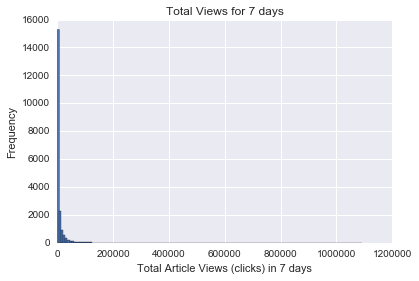

In [8]:
df['articleId_totalViews_7days'].plot(kind='hist', bins=150)
plt.title('Total Views for 7 days')
plt.xlabel('Total Article Views (clicks) in 7 days')

In [9]:
df.articleId_totalViews_7days.describe()

count      20535.000000
mean       10345.854492
std        34507.967560
min            3.000000
25%          761.000000
50%         2322.000000
75%         7523.000000
max      1091325.000000
Name: articleId_totalViews_7days, dtype: float64

#### Looking at the above:
- The data is heavily skewed and a natural/intuitive split is not obvious.
- We will take the natural log of our "total_article_views" number and re-examine our distribution

### 3.2 Log Distribution

In [10]:
def Loggify(df):
    '''Function to take the natural log of various columns
    and create new columns with this logged data'''
    
    df["articleId_totalViews_7days_log"] = df['articleId_totalViews_7days'].apply(np.log)
    df['view_15mins_log']=df['view_15mins'].apply(np.log).replace([-np.inf], 0)
    df['view_30mins_log']=df['view_30mins'].apply(np.log).replace([-np.inf], 0);
    df['view_45mins_log']=df['view_45mins'].apply(np.log).replace([-np.inf], 0);
    df['H1_view_log']=df['H1_view'].apply(np.log).replace([-np.inf], 0); 
    df['articleId_q1_fb_ref_log']=df['articleId_q1_fb_ref'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_google_ref_log']=df['articleId_q1_google_ref'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_twitter_ref_log']=df['articleId_q1_twitter_ref'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_internal_ref_log']=df['articleId_q1_internal_ref'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_paidFlag_log']=df['articleId_q1_paidFlag'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_fb_paidPromo_log']=df['articleId_q1_fb_paidPromo'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_fb_internalFBPagePromo_log']=df['articleId_q1_fb_internalFBPagePromo'].apply(np.log).replace([-np.inf], 0);
    df['articleId_q1_fb_organic_log']=df['articleId_q1_fb_organic'].apply(np.log).replace([-np.inf], 0);
        
    # the following columns may not be present, depending on the input dataset
    try: df['H2_view_log']=df['H2_view'].apply(np.log).replace([-np.inf], 0); 
    except: pass    
    try: df['H3_view_log']=df['H3_view'].apply(np.log).replace([-np.inf], 0);
    except: pass
    try: df['H4_view_log']=df['H4_view'].apply(np.log).replace([-np.inf], 0); 
    except: pass
        
    return df

In [11]:
Loggify(df)
df.head(1)

,articleId,articleId_totalViews_7days,date_time_min,age_day_Max,publish_date_min,artk_min_date_in_DB,sumrow_checkcolumn,MAX_article_date_time_mins_index,articleName,subSectionName,...,H1_view_log,articleId_q1_fb_ref_log,articleId_q1_google_ref_log,articleId_q1_twitter_ref_log,articleId_q1_internal_ref_log,articleId_q1_paidFlag_log,articleId_q1_fb_paidPromo_log,articleId_q1_fb_internalFBPagePromo_log,articleId_q1_fb_organic_log,H2_view_log
0,1875985,1091325,2016-09-29 08:34:47.687 UTC,0,2016-09-29,2016-09-29,101,60,miss universe winner who sparked donald trump ...,38,...,4.615121,0,1.386294,0,4.465908,0,0,0,0,4.615121


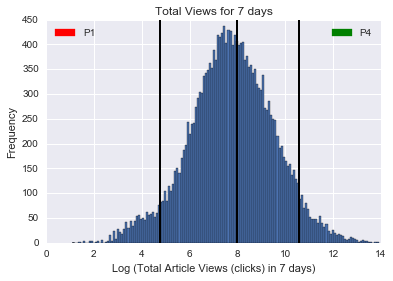

In [12]:
import matplotlib.patches as mpatches

df['articleId_totalViews_7days_log'].plot(kind='hist', bins=150)
plt.title('Total Views for 7 days')
plt.xlabel('Log (Total Article Views (clicks) in 7 days)')

# draw vertical lines for the chosen performance categories
plt.plot([4.76, 4.76 ], [0, 450], 'k-', lw=2) 
plt.plot([8, 8], [0, 450], 'k-', lw=2)
plt.plot([10.57, 10.57 ], [0, 450], 'k-', lw=2)

red_patch = mpatches.Patch(color='red', label='P1')
green_patch = mpatches.Patch(color='green', label='P4')

legendP1 = plt.legend(handles=[red_patch], loc="upper left")

plt.legend(handles=[green_patch], loc="upper right")
plt.gca().add_artist(legendP1)

#### Looking at the above:
- This log distribution can be more easily divided into performance categories
- The distribution was divided into 4 performance categories - demarked by the vertical black lines
    - P1: Lowest Performing
    - P2: Mid-Low
    - P3: Mid-High
    - P4: Highest Performing
- The function below assigns a performance category to each article

### 3.2 Assign performance labels 
- Add a "Performance" column which will have a value from 1 to 4 for each article

In [13]:
def P_label_log(df):
    '''Function split our data and create an article performance column'''
    
    df["Performance"] = 0
    
    df.loc[(df['articleId_totalViews_7days_log'] > 0) & (df['articleId_totalViews_7days_log']\
        <= 4.76), ['Performance']] = 1
    df.loc[(df['articleId_totalViews_7days_log'] > 4.76) & (df['articleId_totalViews_7days_log']\
        <= 8), ['Performance']] = 2
    df.loc[(df['articleId_totalViews_7days_log'] > 8) & (df['articleId_totalViews_7days_log']\
        <= 10.57), ['Performance']] = 3
    df.loc[(df['articleId_totalViews_7days_log'] > 10.57), ['Performance']] = 4
    
    return df

In [14]:
# Apply the performance column to each article in the dataframe
P_label_log(df)

df.head(1)

,articleId,articleId_totalViews_7days,date_time_min,age_day_Max,publish_date_min,artk_min_date_in_DB,sumrow_checkcolumn,MAX_article_date_time_mins_index,articleName,subSectionName,...,articleId_q1_fb_ref_log,articleId_q1_google_ref_log,articleId_q1_twitter_ref_log,articleId_q1_internal_ref_log,articleId_q1_paidFlag_log,articleId_q1_fb_paidPromo_log,articleId_q1_fb_internalFBPagePromo_log,articleId_q1_fb_organic_log,H2_view_log,Performance
0,1875985,1091325,2016-09-29 08:34:47.687 UTC,0,2016-09-29,2016-09-29,101,60,miss universe winner who sparked donald trump ...,38,...,0,1.386294,0,4.465908,0,0,0,0,4.615121,4


### 4.0 Feature lists
- We need to create some feature lists, these features will be used by our model to predict the "Performance" label
- The "All features" list will contain all available features
- The "features_hour1" list will just contain information from the first hour of an article's release

In [15]:
# create a list with every column just for reference
all_features = []

for column in df.columns:
    all_features.append(column)
    
all_features    

['articleId',
 'articleId_totalViews_7days',
 'date_time_min',
 'age_day_Max',
 'publish_date_min',
 'artk_min_date_in_DB',
 'sumrow_checkcolumn',
 'MAX_article_date_time_mins_index',
 'articleName',
 'subSectionName',
 'paidFlag',
 'mean_hourOfDay',
 'RG_Homepage',
 'RG_Article',
 'RG_Section',
 'RG_Facebook',
 'RG_Twitter',
 'RG_Google',
 'RG_Other_Drudge_Direct',
 'S_TVShowBiz',
 'S_news',
 'S_living',
 'S_sport',
 'S_other',
 'fb_paidPromo',
 'fb_internalPromo',
 'fb_organic',
 'view_15mins',
 'view_30mins',
 'view_45mins',
 'H1_view',
 'H2_view',
 'articleId_q1_fb_ref',
 'articleId_q1_google_ref',
 'articleId_q1_twitter_ref',
 'articleId_q1_internal_ref',
 'articleId_q1_paidFlag',
 'articleId_q1_fb_paidPromo',
 'articleId_q1_fb_internalFBPagePromo',
 'articleId_q1_fb_organic',
 'articleId_totalViews_7days_log',
 'view_15mins_log',
 'view_30mins_log',
 'view_45mins_log',
 'H1_view_log',
 'articleId_q1_fb_ref_log',
 'articleId_q1_google_ref_log',
 'articleId_q1_twitter_ref_log',
 'a

In [16]:
# feature list which uses data that has been aggregrated over 1hr
features_hour1 =[
 'paidFlag',
 'subSectionName',   
 'mean_hourOfDay',
 'RG_Homepage',
 'RG_Article',
 'RG_Section',
 'RG_Facebook',
 'RG_Twitter',
 'RG_Google',
 'RG_Other_Drudge_Direct',
 'S_TVShowBiz',
 'S_news',
 'S_living',
 'S_sport',
 'S_other',
 'fb_paidPromo',
 'fb_internalPromo',
 'fb_organic',
 'view_15mins',
 'view_30mins',
 'view_45mins',
 'H1_view',
 'articleId_q1_fb_ref',
 'articleId_q1_google_ref',
 'articleId_q1_twitter_ref',
 'articleId_q1_internal_ref',
 'articleId_q1_paidFlag',
 'articleId_q1_fb_paidPromo',
 'articleId_q1_fb_internalFBPagePromo',
 'articleId_q1_fb_organic'
]

### 5.0 Modelling
- Now down to the prediction of article performance
- GradientBoostingClassifier used after extensive testing of others - see Appendix B
- Extensive model parameter optimization performed - see Appendix C
- f1_score = 2 * (precision X recall) / (precision + recall)

In [17]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [18]:
def GBC_score_hyper(df, features, target):
    '''Function to output a detailed accuracy report using
    a Gradient Boosting Classifier with selected hyper-parameters'''
    
    # split our data into train and test split, can set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    # scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test)
    
    # create classifier with chosen hyper-parameters
    clf = GradientBoostingClassifier(min_samples_split=8, n_estimators=130,\
                                     max_depth=3,min_samples_leaf=1)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    y_true = y_test
        
    #get an accuracy score
    score = clf.score(X_test, y_test)
    
    f1_accuracy = f1_score(y_true, y_pred, average=None)
    
    print "accuracy_score: %.3f%%\n" %score  
    print classification_report(y_true, y_pred), "\n\n"

### 5.1 Accuracy using first hour of data only

In [19]:
%%time
print "GBC\nTarget = Performance\n","All Features\n\n",\
    GBC_score_hyper(df, features_hour1, "Performance"), "\n\n"   

GBC
Target = Performance
All Features

accuracy_score: 0.743%

             precision    recall  f1-score   support

          1       0.71      0.66      0.68       295
          2       0.76      0.84      0.80      3152
          3       0.73      0.68      0.70      2385
          4       0.75      0.32      0.45       329

avg / total       0.74      0.74      0.74      6161



None 


Wall time: 11.1 s


#### Looking at the above:
- An overall accuracy score of 74% was achieved
- An average f1-score 0.73 across all four performance categories
- Despite comprising just 8% of the entire dataset, P4 (best performing) articles were predicted with ~45% accuracy
- All predictions were obtained using just 1hr of data (first hour since article release)

### 5.2 GBC Confusion Plots
- Let's look at some confusion plots

In [20]:
def GBC_confusion_plot(df, features, target, normalize=False):
    '''Function to plot a confusion matrix'''
    
    # split our data into train and test split, set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
     # scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test) 
        
    # MODEL
    clf = GradientBoostingClassifier(min_samples_split=2, n_estimators=100,\
                                     max_depth=3,min_samples_leaf=7)

    clf.fit(X_train, y_train)
        
    # obtain the predicitons to compare with the acutal label eg. "performance"
    y_pred = clf.predict(X_test)
    y_true = y_test
    
    cm = confusion_matrix(y_true, y_pred)
    classes=[1,2,3,4]
    title='Confusion matrix, without normalization'
    cmap=plt.cm.Blues
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    import itertools

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")
    plt.show()
    #plt.savefig('confusion_matrix.png', format='png')

1hour old feature set
Confusion matrix, without normalization
[[ 212  117    0    0]
 [  60 2583  433    0]
 [   3  766 1652   29]
 [   0   30  185   91]]


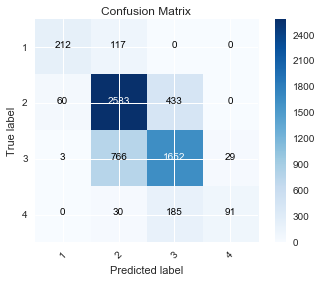

In [21]:
print "1hour old feature set"

GBC_confusion_plot(df, features_hour1, "Performance")

#### Looking at the above:
- Although there are no instances of a P4 article being mistaken for a P1 article (or vice-versa), we do encounter some difficulty when trying to distinguish a P3 article from a P4

### 5.3 GBC feature importances
- Let's look at what's driving our predictive power

In [22]:
def GBC_coef(df, features, target):
    '''Function to extract the feature importances after fitting the data'''
    
    # split our data into train and test split, can set random_state=1 if repeat analysis desired
    train, test = train_test_split(df, test_size=0.3) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    # scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test)
    
    clf = GradientBoostingClassifier(min_samples_split=2, n_estimators=100, max_depth=3, min_samples_leaf=7)

    clf.fit(X_train, y_train)
        
    #get an accuracy score
    score = clf.score(X_test, y_test)
    
    # get the feature coefficients
    feature_importance = clf.feature_importances_
    
    # create a dictionary to then print a sorted list of coefficients
    feature_dict = {}
        
    for k,v in sorted(zip(features, feature_importance)):
        feature_dict[k]=v
    
    import operator
    sorted_dict = sorted(feature_dict.items(), reverse=True, key=operator.itemgetter(1))   
    
    print "accuracy_score: %.3f%%\n" %score
    for k,v in sorted_dict:
        print k,v

In [23]:
GBC_coef(df, features_hour1, "Performance")

accuracy_score: 0.748%

H1_view 0.196432992951
articleId_q1_internal_ref 0.156240800743
mean_hourOfDay 0.145912061366
view_45mins 0.0620226133989
view_15mins 0.0473804329224
view_30mins 0.0462844461875
subSectionName 0.0439924392222
RG_Article 0.0437968628302
RG_Homepage 0.0369541618882
S_TVShowBiz 0.035517590477
S_living 0.0264431057911
articleId_q1_google_ref 0.0240685912913
fb_internalPromo 0.0227448583406
articleId_q1_twitter_ref 0.020067213043
S_sport 0.0149800380431
RG_Twitter 0.0138960781513
RG_Google 0.0127152779509
S_other 0.00953968149005
articleId_q1_fb_internalFBPagePromo 0.0090846589691
RG_Facebook 0.00709413532401
articleId_q1_fb_organic 0.00617572595065
S_news 0.0057430782748
articleId_q1_fb_ref 0.00496343957013
fb_organic 0.00413422935189
RG_Other_Drudge_Direct 0.0038154864718
paidFlag 0.0
articleId_q1_fb_paidPromo 0.0
fb_paidPromo 0.0
articleId_q1_paidFlag 0.0
RG_Section 0.0


#### Looking at the above:
- As expected the number of views an article receives in the first hour is the most valuable predictor
- The "mean_hourOfDay" the article is accessed is also a big driver - warrants more investigation - can we identify commuter driven traffic
- The various referrel sources and promotional tags also influence the prediction outcome

### 6.0 Conclusions and Suggestions

- Prediction of article performance using just 1hr of data is possible

- The best model gave an overall accuracy score of 74% and and average f1-score 0.73 across all four performance categories (1 hour of data)

- Despite comprising just 8% of the entire dataset, best performing articles are predicted with over 40% accuracy

- The newspaper source involved will soon benefit from the addition of greater detail to their online data - the addition of these features will likely lead to an improvement in the performance of future models

- Future projects may aim to integrate these extra features and then aim to delve deep into the important features in order to extract insights

- Of particular interest to the online newspaper is how to convert infrequent or “dormant” visitors into regular visitors. Future analysis could aim to include more extensive user information during modelling

### Appendix A - All features vs. One feature
- We will compare results obtained when:
    - using a multitude of features from the first hour
    - using just the total number of hits/clicks received in the first hour

In [24]:
features_views_H1 =['H1_view']

print "Model = GBC\nTarget = Performance\n","Features = All features from first hour\n\n",\
    GBC_score_hyper(df, features_hour1, "Performance"), "\n\n"   
    
print "Model = GBC\nTarget = Performance\n","Features = Just views in first hour\n\n",\
    GBC_score_hyper(df, features_views_H1, "Performance"), "\n\n"       

Model = GBC
Target = Performance
Features = All features from first hour

accuracy_score: 0.740%

             precision    recall  f1-score   support

          1       0.74      0.69      0.71       307
          2       0.76      0.83      0.79      3183
          3       0.71      0.67      0.69      2371
          4       0.76      0.32      0.45       300

avg / total       0.74      0.74      0.73      6161



None 


Model = GBC
Target = Performance
Features = Just views in first hour

accuracy_score: 0.682%

             precision    recall  f1-score   support

          1       0.63      0.41      0.49       301
          2       0.70      0.80      0.75      3108
          3       0.67      0.63      0.65      2438
          4       0.60      0.15      0.24       314

avg / total       0.68      0.68      0.67      6161



None 




#### Looking at the above:
- Our f1-accuracy scores are significantly increased with the addition of the extra features

### Appendix B - Model Cycle
- Test a number of different models and compare accuracy scores

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
def model_cycle(df, features, target):
    '''Function to quickly cycle through multiple models & get accuracy scores
    Default parameters are used'''
    
    # split our data into train and test split, set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3, random_state=1) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    # scale the features
    min_max_scaler = MinMaxScaler()
    X_test = min_max_scaler.fit_transform(X_test) 
    X_train = min_max_scaler.fit_transform(X_train)
    
    # LINE UP SOME MODELS
    names = ["Logistic Regression", "Nearest Neighbors","Decision Tree",\
             "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA", "GBC"]

    classifiers = [
    LogisticRegression(),    
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier()    
        ]
  
    # iterate over classifiers and print the score
    for name, clf in zip(names, classifiers):
        
        # fit the model to the training data
        clf.fit(X_train, y_train)
        
        #get an accuracy score
        score = clf.score(X_test, y_test)
    
        y_pred = clf.predict(X_test)
    
        y_true = y_test
    
        f1_accuracy = f1_score(y_true, y_pred, average=None)
    
        #print that score as a percentage
        print name,"accuracy_score: %.3f%%\n" %score   
        print classification_report(y_true, y_pred), "\n\n"

In [27]:
model_cycle(df, features_hour1, "Performance")

Logistic Regression accuracy_score: 0.634%

             precision    recall  f1-score   support

          1       0.55      0.12      0.19       308
          2       0.63      0.84      0.72      3088
          3       0.64      0.49      0.56      2442
          4       0.81      0.18      0.29       323

avg / total       0.64      0.63      0.61      6161



Nearest Neighbors accuracy_score: 0.606%

             precision    recall  f1-score   support

          1       0.55      0.54      0.54       308
          2       0.63      0.72      0.67      3088
          3       0.57      0.52      0.55      2442
          4       0.66      0.17      0.27       323

avg / total       0.60      0.61      0.60      6161



Decision Tree accuracy_score: 0.584%

             precision    recall  f1-score   support

          1       0.49      0.64      0.55       308
          2       0.67      0.67      0.67      3088
          3       0.58      0.48      0.53      2442
          4      

C:\Users\James\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:694: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Looking at the above:
- We used default parameters but the GBC classifier is a clear favourite

### Appendix C - GBC parameter selection
- Test hyper-parameter selection for a GradientBoostingClassifier
- First use a randomized approach to zero-in on appropriate parameters (cross-val-fold=5)
- Then use and exhaustive GridSearchCV approach to finalise selection (cross-val-fold=10)

In [28]:
from scipy.stats import randint as sp_randint

In [29]:
def RandomSearchCV(df, features, target, clf, param_grid, n_iter, cv):
    """Test parameters using GridSearchCV and 10-fold cross-validation"""
    
    from sklearn.model_selection import RandomizedSearchCV
    
    # split our data into train and test split, set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3, random_state=1) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    #scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test) 

    
    scores = ['precision', 'recall']

    for score in scores:
        print "# Tuning hyper-parameters for %s" % score
        
        # run randomized search
        
        random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
                                   n_iter=n_iter, cv=cv)
        
        random_search.fit(X_train, y_train)

        print "Best Accuracy: %.3f%%" % random_search.best_score_
        print "Best parameters set found on development set:"
        print  
        print random_search.best_params_
     
        y_true, y_pred = y_test, random_search.predict(X_test)
        print "Detailed classification report:"
        print ""
        print "The model is trained on the full development set."
        print "The scores are computed on the full evaluation set."
        print ""
        print classification_report(y_true, y_pred), "\n\n"

In [30]:
# define the parameter values that should be searched set of parameters to test

# range of parameter values if using RandomSearchCV
gbc_rand_param_grid = {"n_estimators": sp_randint(100, 160),
              "max_depth": [3, None],
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11)}                     

gbc = GradientBoostingClassifier()

In [32]:
%%time
RandomSearchCV(df, features_hour1, "Performance", gbc, gbc_rand_param_grid, 7, 5)

# Tuning hyper-parameters for precision
Best Accuracy: 0.744%
Best parameters set found on development set:

{'min_samples_split': 6, 'n_estimators': 135, 'max_depth': 3, 'min_samples_leaf': 8}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.75      0.70      0.73       308
          2       0.75      0.83      0.79      3088
          3       0.72      0.68      0.70      2442
          4       0.73      0.28      0.40       323

avg / total       0.74      0.74      0.73      6161



# Tuning hyper-parameters for recall
Best Accuracy: 0.746%
Best parameters set found on development set:

{'min_samples_split': 5, 'n_estimators': 147, 'max_depth': 3, 'min_samples_leaf': 10}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precis

In [33]:
def GridSearchCV(df, features, target, classifier, param_grid):
    """Test parameters using GridSearchCV and 10-fold cross-validation"""
    
    from sklearn.model_selection import GridSearchCV
    
    # split our data into train and test split, set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3, random_state=1) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    #scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test) 

    # Set the parameters by cross-validation
    param_grid = param_grid
    
    scores = ['precision', 'recall']

    for score in scores:
        print "# Tuning hyper-parameters for %s" % score
        
        clf = GridSearchCV(classifier, param_grid, cv=10,
                       scoring='%s_macro' % score)
        clf.fit(X_train, y_train)

        print "Best Accuracy: %.3f%%" % clf.best_score_
        print "Best parameters set found on development set:"
        print  
        print clf.best_params_
     
        y_true, y_pred = y_test, clf.predict(X_test)
        print "Detailed classification report:"
        print ""
        print "The model is trained on the full development set."
        print "The scores are computed on the full evaluation set."
        print ""
        print classification_report(y_true, y_pred), "\n\n"

In [34]:
# specific parameter values if using GridSearchCV
gbc_grid_param_grid = {"n_estimators": [130, 150],
                    "min_samples_leaf": [8, 10]
                        }

In [36]:
%%time
GridSearchCV(df, features_hour1, "Performance", gbc, gbc_grid_param_grid)

# Tuning hyper-parameters for precision
Best Accuracy: 0.738%
Best parameters set found on development set:

{'n_estimators': 130, 'min_samples_leaf': 10}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.74      0.70      0.72       308
          2       0.75      0.83      0.79      3088
          3       0.72      0.68      0.70      2442
          4       0.73      0.28      0.40       323

avg / total       0.73      0.74      0.73      6161



# Tuning hyper-parameters for recall
Best Accuracy: 0.627%
Best parameters set found on development set:

{'n_estimators': 150, 'min_samples_leaf': 8}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.76      0.69      0.72   

### Appendix C - What happens to accuracy as we increase the input data timespan
- What happens to our prediction performance as we include more data?
- The graph below displays the model performance as a function of the time-period of data used to model. For instance the first point on the graph uses information from only the 1st 15 minutes of the article's release. The 2nd point corresponds to the accuracy achieved using data from only the first 30 minutes of the article release. We then increase in hour intervals up to and including 8 hrs of data.

In [37]:
# scores are manually entered - calculations performed in separate notebook
df_GBC_score = pd.DataFrame(data={
        'Average_f1_score': [0.67, 0.69, 0.73, 0.76, 0.78, 0.79, 0.80, 0.82, 0.83, 0.84],
        'HighPerformance(P4)_f1_score':[0.26,0.29,0.39,0.51,0.59,0.64,0.66,0.70,0.71,0.72]
    }, index = [0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8])

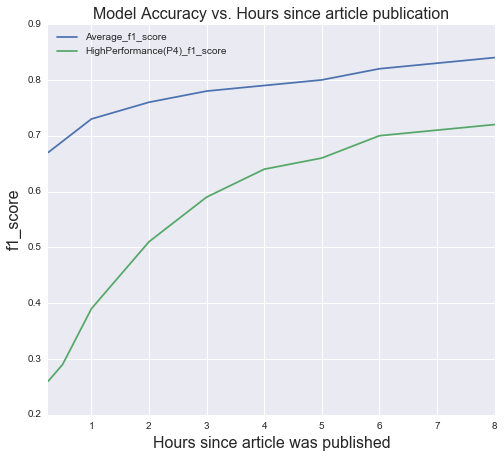

In [38]:
ax = df_GBC_score.plot(figsize=(8,7))

ax.set_title("Model Accuracy vs. Hours since article publication").set_fontsize(16)
ax.set_xlabel("Hours since article was published").set_fontsize(16)
ax.set_ylabel("f1_score").set_fontsize(16)
ax.legend(loc="upper left")

#### Looking at the above:
- We are trying to predict the amount of views an article will get in 7 days
- More data obviously improves our predictions, but it is interesting to note how important the first 2-4 hours are when trying to classify a P4 (High performance - green line) article.